# produce the figures/numbers for the cosmic rejection paper

In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, '../analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/'

In [3]:
pair_types = ['cosmic' ,'CC 1p 0pi'    ]
labels     = ['Cosmic (data)' ,'CC1p0$\\pi$ (MC)']
colors     = ['red'    ,'blue'         ]
cmaps      = ['Reds'   ,'Blues'        ]
fmts       = ['o'      ,'s']

In [4]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [5]:
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
Pt no Delta phi,24.7%,88.7%,46.1%,53.6%,$p_{t}<0.35$ GeV/c,24.7% (941),2.5% (99),0.1% (21),46.1% (569)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)
soft Pmiss,16.3%,95.4%,37.3%,70.7%,$p_{miss}<0.30$ GeV/c,16.3% (621),0.7% (29),0.0% (1),37.3% (460)


# numbers

In [6]:
cutlabels = ['no cut','$dE/dx$ profile','track lengths','colinearity','vertex activity'
             ,'coplanarity','$p_t$ imbalance',r'$\Delta \phi $ \&  $p_{t}$']

Ncosmic = len(reduced_MCbnbDATAcosmicSamples['no cut']['cosmic'])
print "plug in table tab:ApplicationOfCuts in ApplicationOfCuts.tex"
print 
print "\hline \hline"
i_label = 0
for i,row in pureff_MCbnbDATAcosmic_numbers[:].iterrows(): 
    if row['cut label'] == r'$\theta_{pq}<25^0$': continue
    if i_label>= len(cutlabels): break
    cutlabel = cutlabels[i_label]
    if cutlabel == 'coplanarity': print '\hline'
    print "			"+cutlabel+"\
     & \CosmicText{%d"%row['cosmic']+("(%.1f"%(100*float(row['cosmic'])/Ncosmic) if cutlabel!=r'$\Delta \phi $ \&  $p_{t}$' else "(%.3f"%(100*float(row['cosmic'])/Ncosmic))+"\%)}"+"\
     & \MCText{%d"%row['\CCIpOpi']+"(%.1f"%(float(row['eff \CCIpOpi']))+"\%)"+"}\
     & \MCText{%.1f"%(float(row['pur \CCIpOpi']))+"\%"+"}\
     \\tabularnewline"
    print "\hline"
    i_label+=1
print
print

plug in table tab:ApplicationOfCuts in ApplicationOfCuts.tex

\hline \hline
			no cut     & \CosmicText{22562(100.0\%)}     & \MCText{1234(100.0\%)}     & \MCText{4.1\%}     \tabularnewline
\hline
			$dE/dx$ profile     & \CosmicText{2102(9.3\%)}     & \MCText{939(76.1\%)}     & \MCText{14.0\%}     \tabularnewline
\hline
			track lengths     & \CosmicText{855(3.8\%)}     & \MCText{789(63.9\%)}     & \MCText{19.2\%}     \tabularnewline
\hline
			colinearity     & \CosmicText{351(1.6\%)}     & \MCText{758(61.4\%)}     & \MCText{24.0\%}     \tabularnewline
\hline
			vertex activity     & \CosmicText{127(0.6\%)}     & \MCText{657(53.2\%)}     & \MCText{39.4\%}     \tabularnewline
\hline
\hline
			coplanarity     & \CosmicText{44(0.2\%)}     & \MCText{591(47.9\%)}     & \MCText{56.3\%}     \tabularnewline
\hline
			$p_t$ imbalance     & \CosmicText{21(0.1\%)}     & \MCText{569(46.1\%)}     & \MCText{53.6\%}     \tabularnewline
\hline
			$\Delta \phi $ \&  $p_{t}$     & \CosmicText{1(0.004\%

# Figures

In [7]:
#---------------------------------------------------------------------------------------------
# Aug-1, 2017
def plot_feature_pairs(cut_name='${PID}_a$',
                       var='l_long',x_label='$l_{long}$ [cm]',mul=1,                                
                       bins=np.linspace(0,300,50),
                       figsize=(12,8),legend_fontsize=25,fontsize=25,
                       do_add_legend=False,legend_loc='upper center', 
                       ticks_color='black'):
    fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    text_colors=[]
    for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        if len(sample) < 10: continue
        h,bins,_=plt.hist(mul*sample[var],normed=1,bins=bins,histtype='step',linewidth=3,color=color)
        text_colors.append(color)
        p = plt.plot([0,0],[0,0], label=label,linestyle='-',linewidth=6,color=color)
        if np.max(h)>max_h:
            max_h=np.max(h)
        
    if do_add_legend:
        leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc)
        for text_color,text in zip(text_colors,leg.get_texts()):
            text.set_color(text_color)

    set_axes(ax,x_label=x_label,y_label='normalized counts [a.u.]',fontsize=fontsize
             ,ticks_color=ticks_color,do_add_grid=True
             ,xlim=(np.min(bins),np.max(bins)),ylim=(0,1.05*max_h))
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
#     ax.yaxis.set_major_formatter(ticker.NullFormatter())
    plt.tight_layout()
    return ax
#---------------------------------------------------------------------------------------------


#---------------------------------------------------------------------------------------------
# July-11, 2017
def plot_cut_samples (reduced_cut_name=None,
                      cut_name=None,mul=1,
                      cut_var =None,
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]', y_label='% of sample',
                      xcenter=0,figsize=(12,8),fontsize=25,markers_size=30,
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True, legend_loc='bbox',legend_fontsize=25,
                      ticks_color='black'
                      ,do_add_texts=False,xy_cosmic_text=(0,0),xy_MC_text=(0,0),MC_text=labels[1]):
    fig,ax=plt.subplots(figsize=figsize)
    for i,(pair_type,label,cmap,color,fmt) in enumerate(zip(pair_types,labels,cmaps,colors,fmts)):
        sample = reduced_MCbnbDATAcosmicSamples[reduced_cut_name][pair_type]
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_err = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_err = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_err , xerr=0, fmt=fmt 
                     , markersize=markers_size , label=label, color=color, capthick=1 , capsize=2)
    leg=None
    if do_add_legend: 
        if 'bbox' not in legend_loc:
            leg=ax.legend(fontsize=legend_fontsize,loc=legend_loc,markerscale=2.)
        else:
            leg=ax.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.,fontsize=legend_fontsize,markerscale=2.)
        for color,text in zip(colors,leg.get_texts()):
            text.set_color(color)
    if do_add_texts:
        ax.text(xy_cosmic_text[0],xy_cosmic_text[1],labels[0],color=colors[0],fontsize=fontsize)
        ax.text(xy_MC_text[0],xy_MC_text[1],MC_text,color=colors[1],fontsize=fontsize)
    ax.set_ylim(0,101)
    ax.set_xlim(xmin,xmax)
    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,ticks_color=ticks_color,xticks=np.linspace(xmin,xmax,7),yticks=[25,50,75,100],do_add_grid=True)
    plt.tight_layout()
    return ax,leg
#---------------------------------------------------------------------------------------------

# $\mu-p$ distance

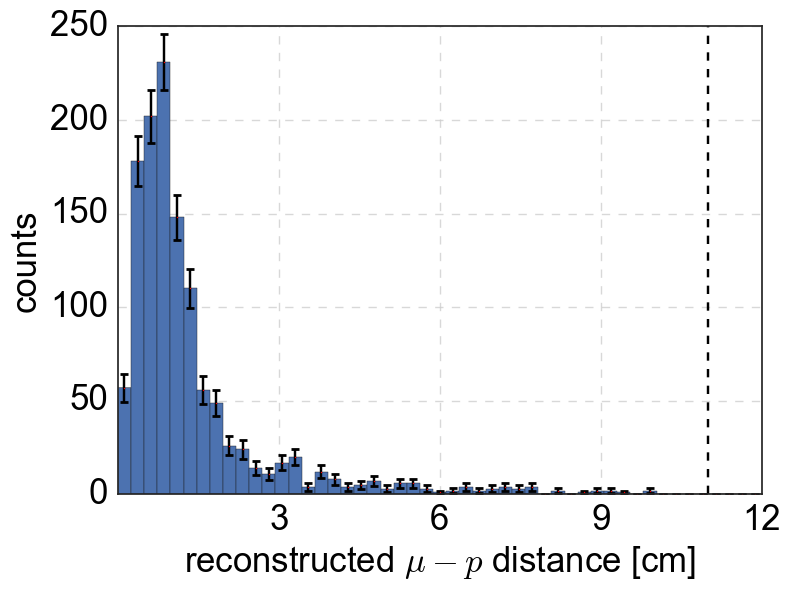

In [8]:
CC1p0pi = reduced_MCbnbDATAcosmicSamples['no cut']['CC 1p 0pi']
x = CC1p0pi['distance']
fig,ax=plt.subplots(figsize=(8,6))
h,bins,_=ax.hist(x,bins=np.linspace(0,12,50)) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color='red' , ecolor='black', capthick=2)
set_axes(ax,'reconstructed $\\mu-p$ distance [cm]' , 'counts', fontsize=25 ,xticks=[3,6,9,12])
ax.grid(linestyle='--',alpha=0.75)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.tight_layout()
plt.savefig(figures_path+'mup_distance.pdf')

# detection cuts

# $PID_a$

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4234: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins == 'log':
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4234: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if bins == 'log':


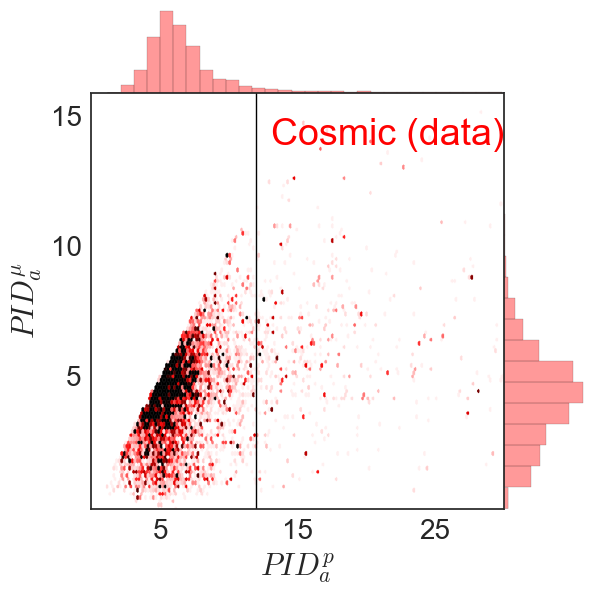

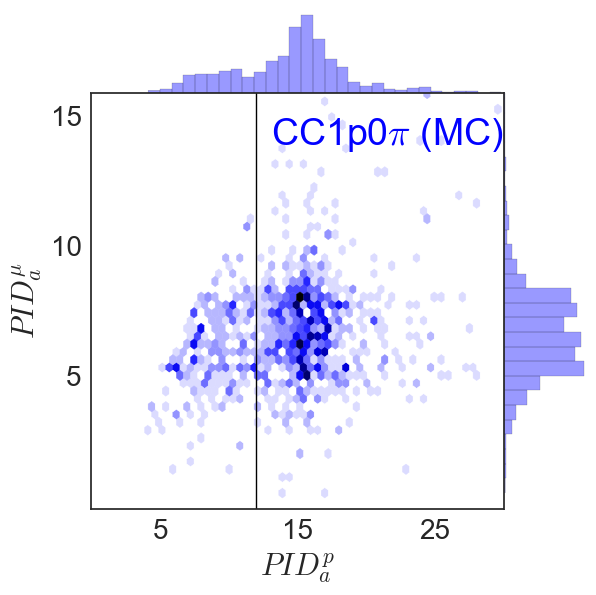

In [9]:
PIDaCut = 12
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)): 
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    sample = sample[sample['PIDa_assigned_proton']<30]    
    g = sns.jointplot(sample['PIDa_assigned_proton'], sample['PIDa_assigned_muon']
                      ,space=0
                      ,stat_func=None
                      ,kind="hex"                      
                      ,bins=np.linspace(0,30,30)
                      ,gridsize=150 if i==0 else 50
                      ,xlim=(0,30)
                      ,ylim=(0,16)
                      ,color=color                       
                      ,marginal_kws={'color':color,'bins':30})
    g.set_axis_labels('$PID_{a}^{p}$','$PID_{a}^{\\mu}$')
    g.ax_joint.set_xticks([5,15,25]); g.ax_joint.set_yticks([5,10,15])
    g.ax_joint.plot([PIDaCut,PIDaCut],g.ax_joint.get_ylim(),'-',color='black',linewidth=1)
    g.fig.text(0.45,0.75,label, color=color, fontsize=27) #add text
    g.savefig(figures_path+'PIDa_mu_p_%d.pdf'%i)

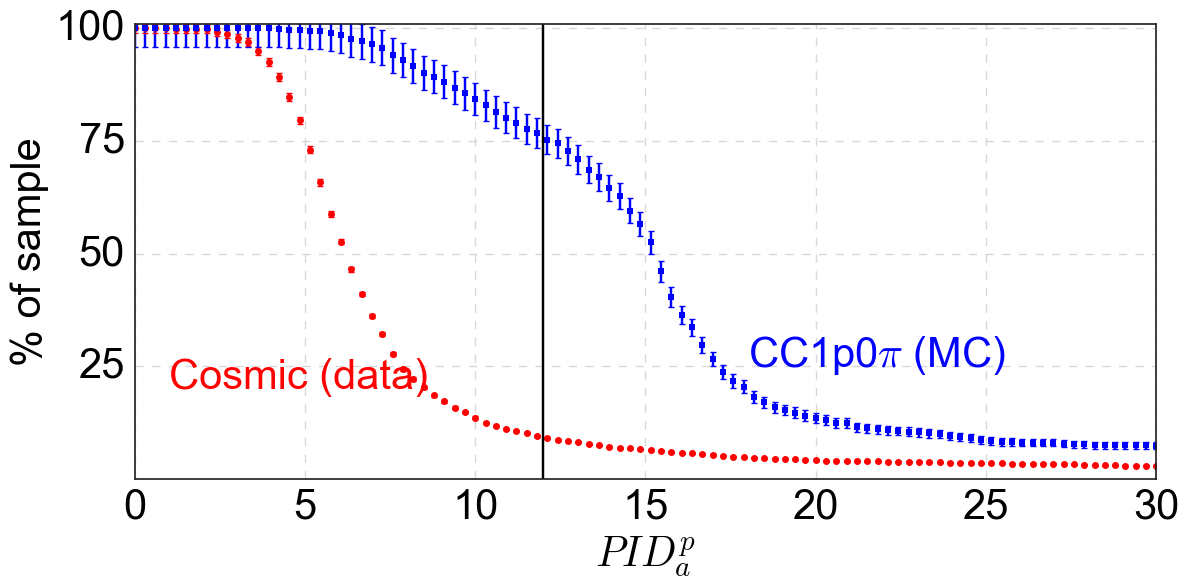

In [10]:
# impact of PIDa cut
ax,leg=plot_cut_samples(reduced_cut_name='no cut',markers_size=5,figsize=(12,6)
                        ,cut_var ='PIDa_assigned_proton'
                        ,cut_type= 'min',fontsize=30
                        ,x_label = r'$PID_{a}^{p}$'
                        ,xmin=0, xmax=30 , Nbins=100
                        ,do_add_legend=False,legend_loc='upper right'
                        ,do_add_texts=True,xy_cosmic_text=(1,20),xy_MC_text=(18,25))
# plt.text(1,5,r'cut on $PID_{a}^{p}$',fontsize=25)
plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'PIDa_cuts.pdf', bbox_inches='tight')

# length

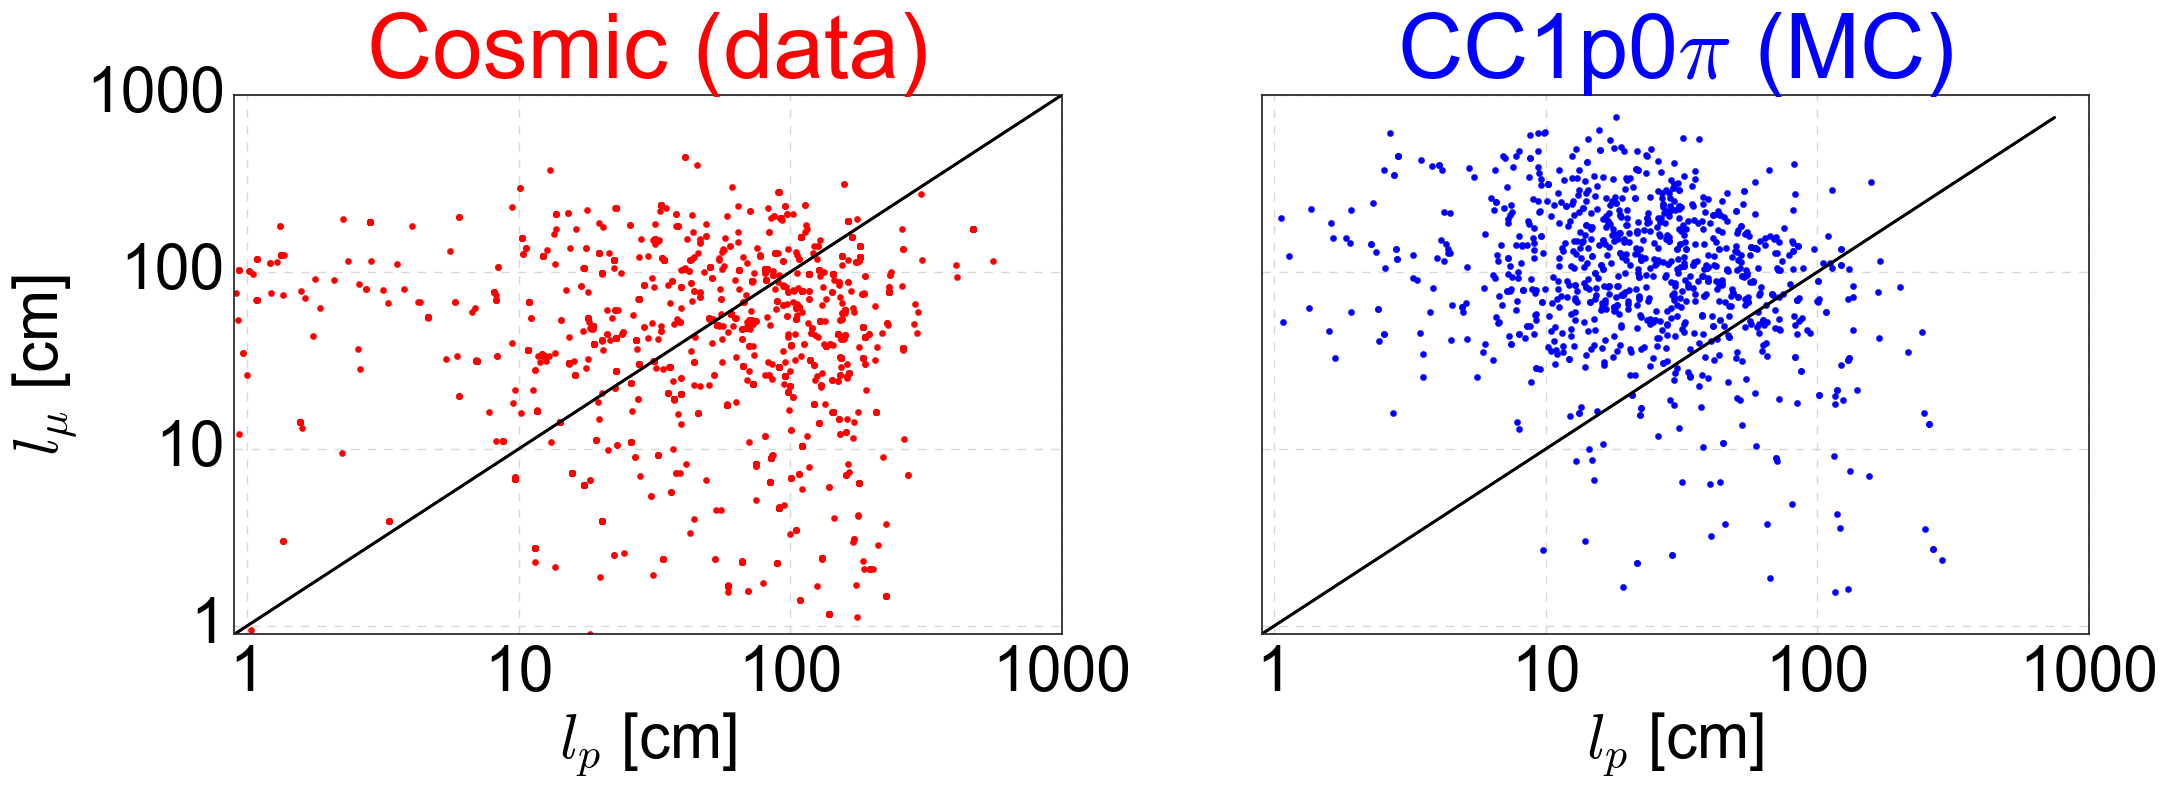

In [11]:
fig = plt.figure(figsize=(22,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label=r'$l_{p}$ [cm]',r'$l_{\mu}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
    sample = reduced_MCbnbDATAcosmicSamples['PIDa'][pair_type]
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=65,y=1.02,color=color)
    ax.scatter(sample['l_assigned_proton'], sample['l_assigned_muon'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_assigned_muon'])],[0,np.max(sample['l_assigned_muon'])],'-',color='black',linewidth=2)
    plt.plot([0,np.max(sample['l_assigned_muon'])],[0,np.max(sample['l_assigned_muon'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,do_add_grid=True)    
    ax.xaxis.set_ticks([1,10,100,1000])
    ax.yaxis.set_ticks([1,10,100,1000])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.subplots_adjust(right=0.5)
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_after_cut_PIDa.pdf')

# non collinearity

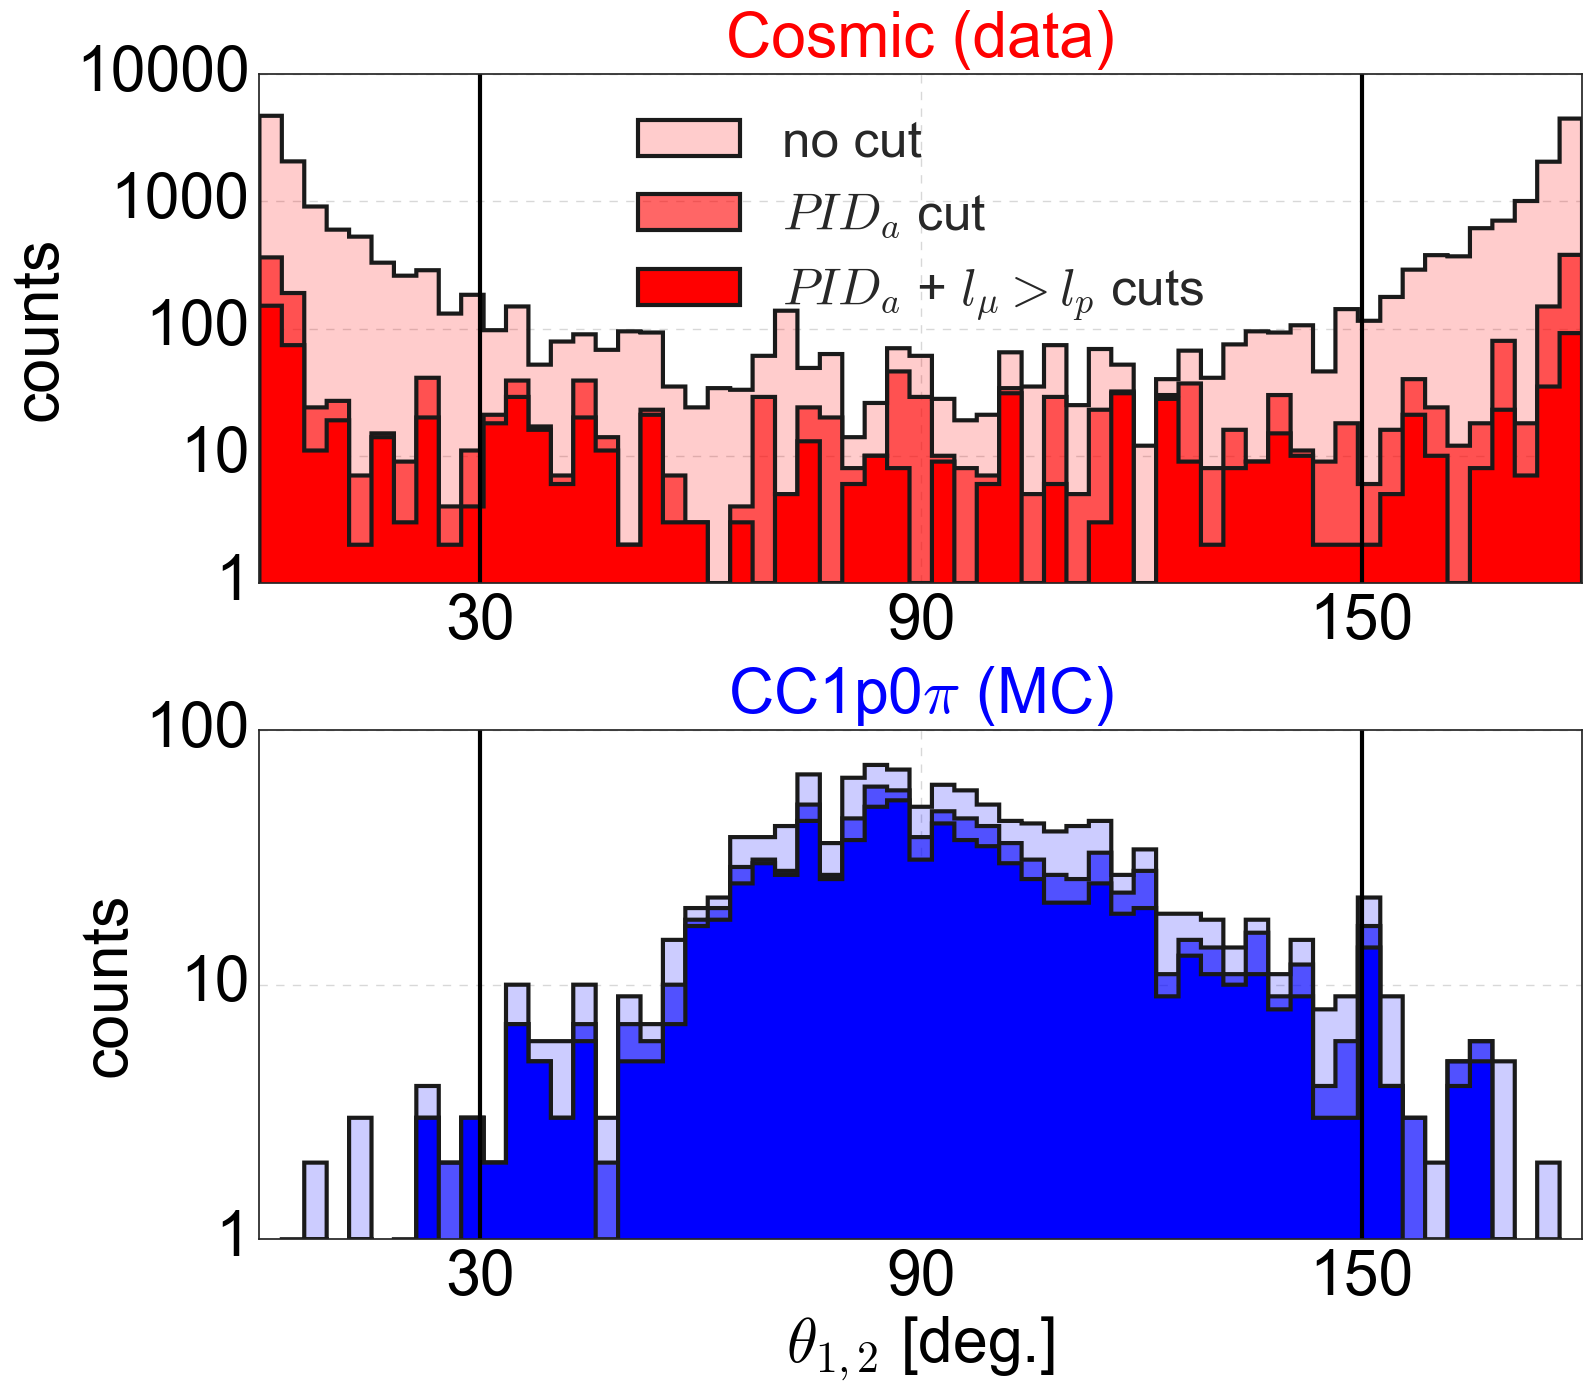

In [23]:
fig = plt.figure(figsize=(16,14))
bins=np.linspace(0,180,60)
x_label=r'$\theta_{1,2}$ [deg.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,labels,cmaps,colors)):
    RGB = (1,0,0) if color=='red' else (0,0,1) if color=='blue' else (0,0,0)
    ax = fig.add_subplot(2,1,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)    
    set_axes(ax,x_label=x_label if i>0 else ''
             , y_label='counts'# if i==0 else ''
             ,fontsize=45
             ,xticks=[30,90,150],yticks=[10,100,1000]
             ,ticks_color='black',do_add_grid=True) 
    # change frame color
    #     for spine in ax.spines.values(): spine.set_edgecolor(color) 
    for cut_name,s_label,alpha in zip(['no cut','PIDa','length'] 
                                      ,['no cut','$PID_a$ cut',r'$PID_a$ + $l_\mu>l_p$ cuts'],[0.2,0.6,1]):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        theta = sample['theta_12'] 
        plt.hist(theta,bins=bins,color=color,histtype='stepfilled'
                 ,label=s_label
                 ,linewidth=3, fc=(RGB[0],RGB[1],RGB[2],alpha)) #,normed=1
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i==0:  ax.legend(fontsize=37,loc='upper center')    
    plt.plot([30,30],ax.get_ylim(),'-',color='black',linewidth=3)
    plt.plot([150,150],ax.get_ylim(),'-',color='black',linewidth=3)


plt.subplots_adjust(right=0.5)
plt.tight_layout()
fig.savefig(figures_path+'theta_12_before_after_cuts_PIDa_length.pdf')

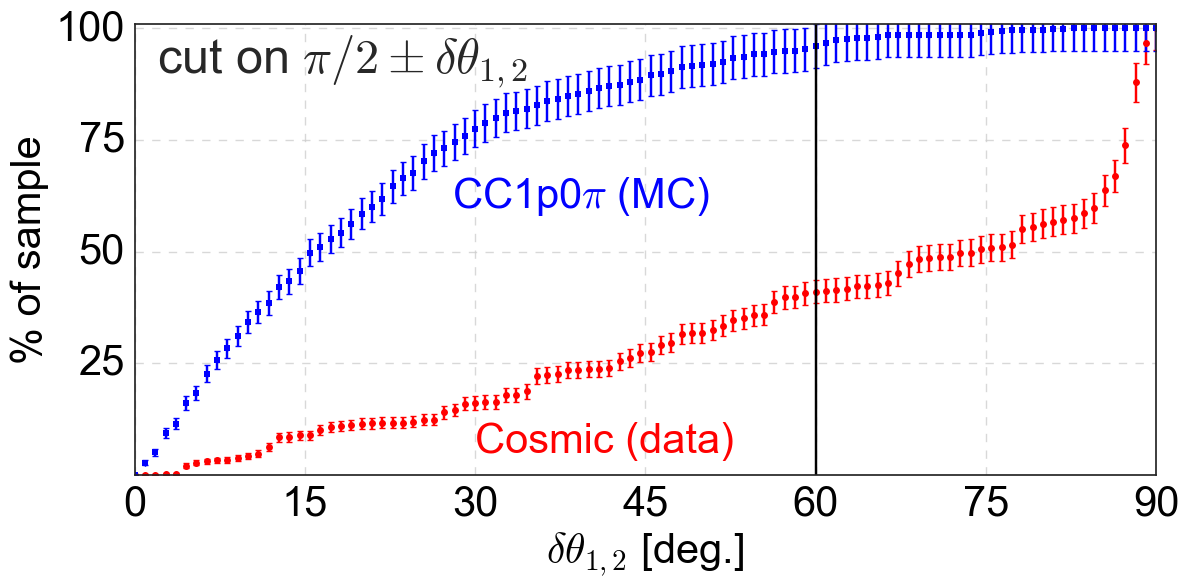

In [13]:
# after cuts on PIDa and tracks-length
ax,leg=plot_cut_samples(reduced_cut_name='length',markers_size=5
                        ,cut_var ='theta_12'
                        ,do_add_legend=False, legend_loc='bbox'
                        ,cut_type= 'symmetric',fontsize=30,figsize=(12,6)
                        ,x_label = r'$\delta \theta_{1,2}$ [deg.]'
                        ,xcenter=90, xmin=0., xmax=90 , Nbins=100
                        ,do_add_texts=True,xy_cosmic_text=(30,5),xy_MC_text=(28,60))
plt.text(2,90,r'cut on $\pi/2 \pm \delta \theta_{1,2}$',fontsize=35)
plt.plot([60,60],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'theta_12_cuts_after_cuts_PIDa_length.pdf',bbox_inches='tight')

# $\Delta \phi$

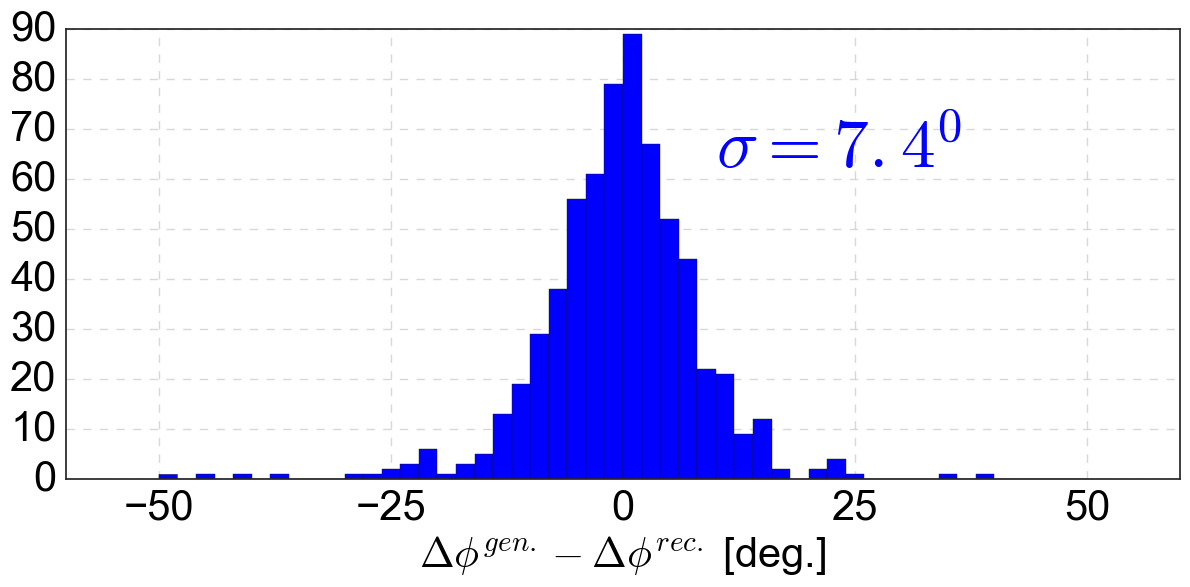

In [14]:
fig,ax=plt.subplots(figsize=(12,6))
pair_type = pair_types[1]; label = labels[1]; color = colors[1]
sample = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-50,50,51),color=color);
set_axes(ax,r'$\Delta \phi^{gen.}-\Delta \phi^{rec.}$ [deg.]' , '', fontsize=30,do_add_grid=True
             ,xticks=[-50,-25,0,25,50])
small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<25]
sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'$^0$',color=color,fontsize=50)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco_after_RdQ_cut.pdf')

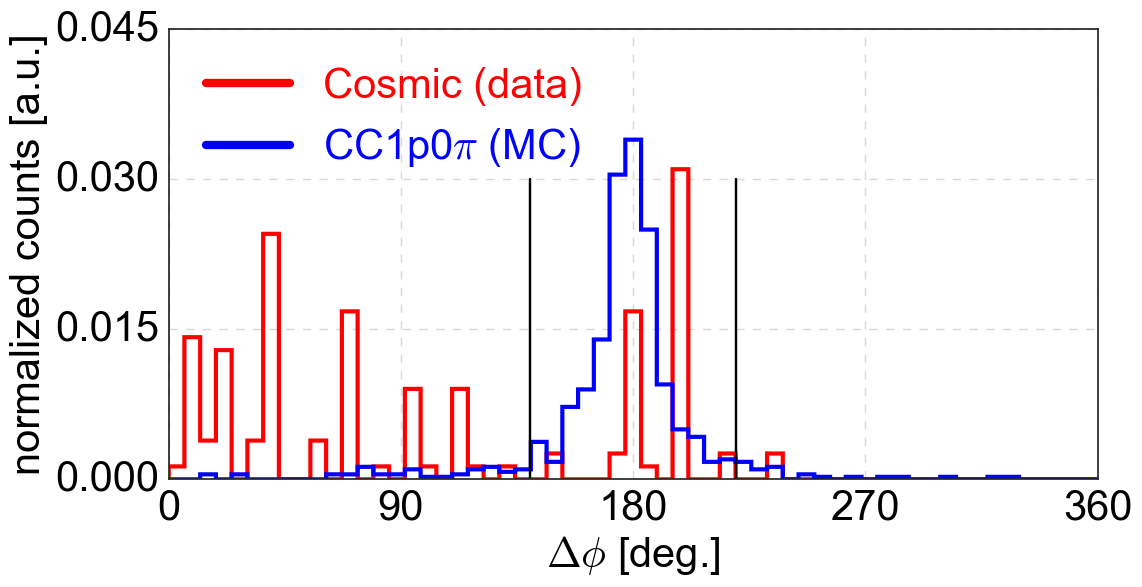

In [15]:
ax=plot_feature_pairs(cut_name='vertex activity'
                   ,var='delta_phi',x_label=r'$\Delta \phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                   ,bins=np.linspace(0,360,60),figsize=(12,6),ticks_color='black',fontsize=30,legend_fontsize=30)
plt.plot([140,140],[0,0.03],'-',color='black')
plt.plot([220,220],[0,0.03],'-',color='black')
ax.set_yticks([0,0.015,0.03,0.045])
plt.savefig(figures_path+'DeltaPhi_after_RdQ_cut.pdf')

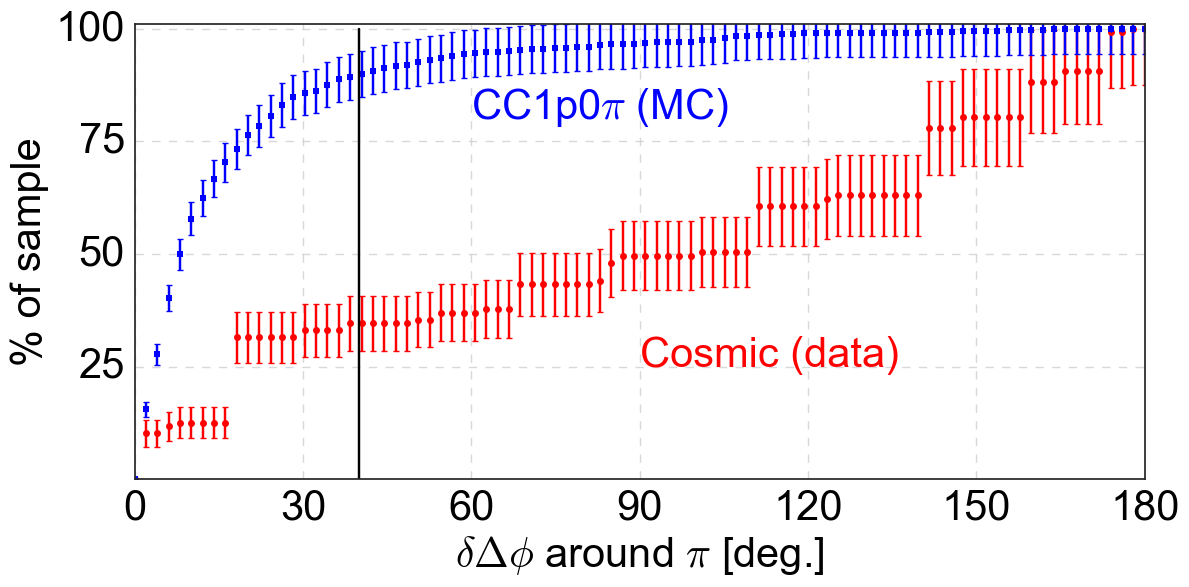

In [16]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex activity'
                        ,do_add_legend=False,markers_size=5
                        ,legend_loc='lower right',
                     cut_var ='delta_phi',cut_type= 'symmetric'
                        ,x_label = r'$\delta \Delta \phi$ around $\pi$ [deg.]'
                        ,ticks_color='black',
                     xcenter=180, xmin=0., xmax=180 , Nbins=90,fontsize=30,figsize=(12,6)
                        ,do_add_texts=True,xy_cosmic_text=(90,25),xy_MC_text=(60,80))
plt.plot([40,40],[0,100],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts_after_RdQ_cut.pdf', bbox_inches='tight')

# $p_t$

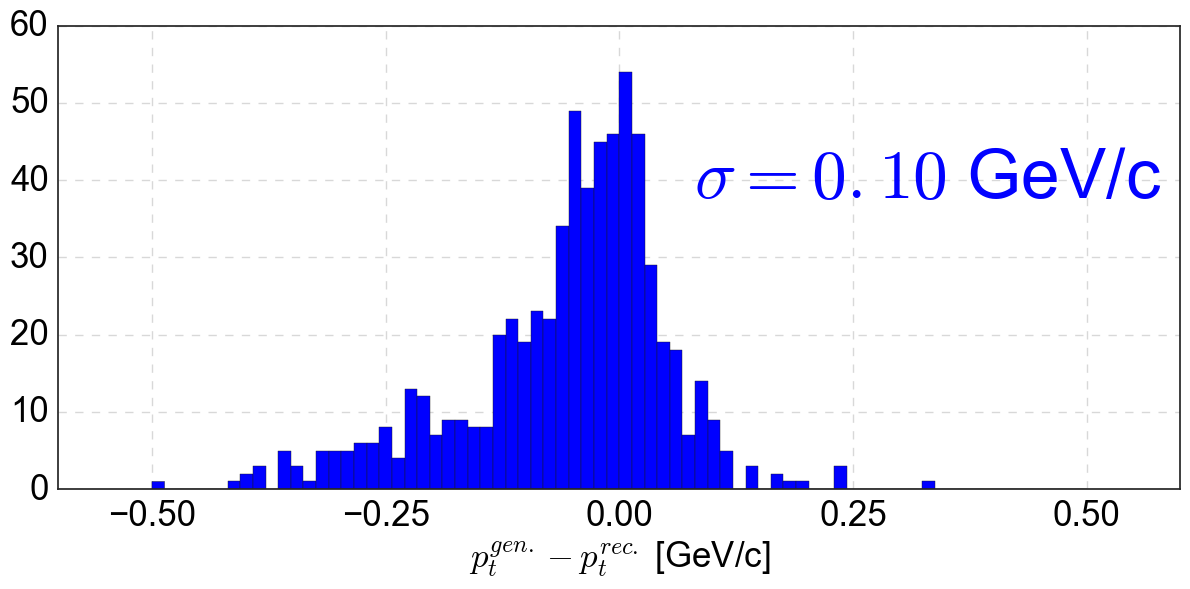

In [17]:
fig,ax=plt.subplots(figsize=(12,6))
pair_type = pair_types[1]; label = labels[1]; color = colors[1]
sample = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
h,bins,_=ax.hist(sample['truth_Pt']-sample['reco_Pt'],bins=np.linspace(-0.5,0.5,75),color=color); 
set_axes(ax,r'$p_{t}^{gen.}-p_{t}^{rec.}$ [GeV/c]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-0.50,-0.25,0,0.25,0.50])
small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<0.35]
sigma = np.std(small_sample['truth_Pt']-small_sample['reco_Pt'])
plt.text(0.08,0.7*np.max(h),'$\\sigma=%.2f$'%sigma+' GeV/c',color=color,fontsize=50)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco_after_RdQ_cut.pdf')

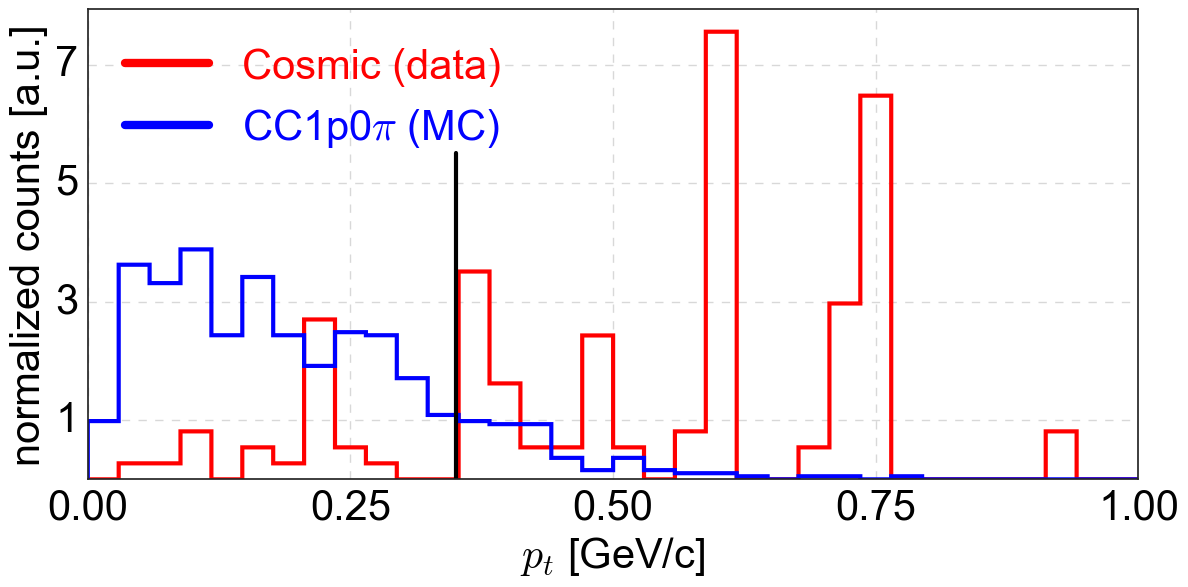

In [18]:
ax=plot_feature_pairs(cut_name='vertex activity',var='reco_Pt',x_label=r'$p_{t}$ [GeV/c]'                              
                      ,bins=np.linspace(0,1,35)                              
                      ,do_add_legend=True
                      ,figsize=(12,6),ticks_color='black',fontsize=30,legend_fontsize=30,legend_loc='upper left')
ax.plot([0.35,0.35],[0,5.5],'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.set_yticks([1,3,5,7])
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_RdQ_cut.pdf')

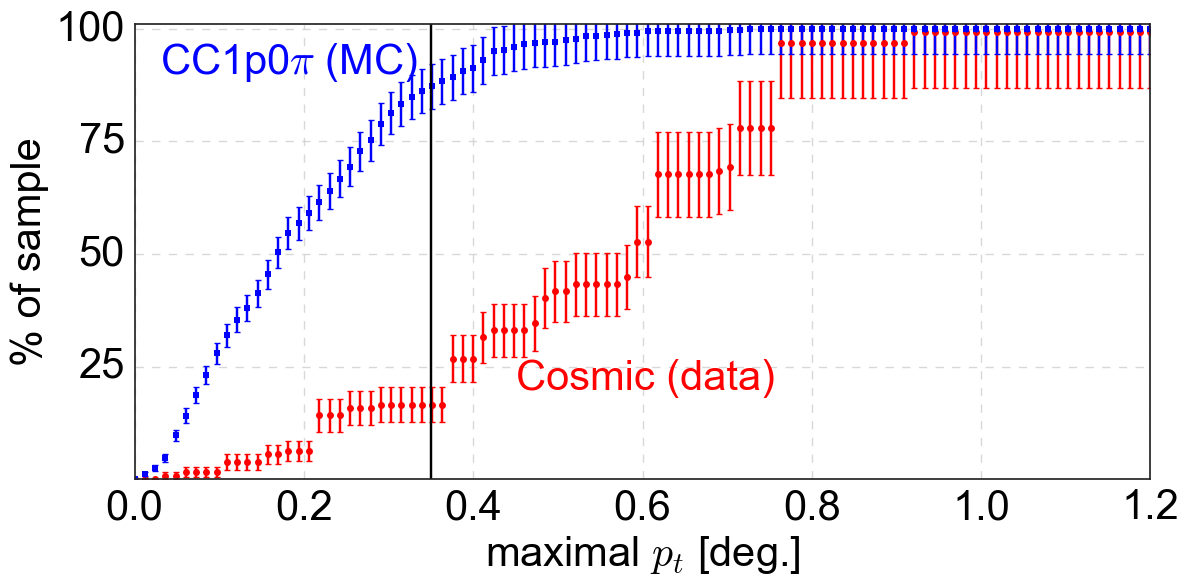

In [19]:
ax,leg=plot_cut_samples(reduced_cut_name='vertex activity',do_add_legend=False,legend_loc='lower right'
                        ,legend_fontsize=25,markers_size=5                
                     ,cut_var ='reco_Pt', cut_type= 'max',ticks_color='black'                 
                     ,x_label = 'maximal $p_{t}$ [deg.]'
                     ,xmin=0, xmax=1.2 , Nbins=100,fontsize=30,figsize=(12,6)
                        ,do_add_texts=True,xy_cosmic_text=(0.45,20),xy_MC_text=(0.03,90));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts_after_RdQ_cut.pdf', bbox_inches='tight')